In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

# Chicago crime data:

In [3]:
df_crime = pd.read_csv('crime_data_final.csv')
df_crime = df_crime.drop('Unnamed: 0', axis=1)
df_crime = df_crime.drop('index', axis=1)
df_crime.head()

,zipcode,date,arrest,domestic,type_ASSAULT,type_BATTERY,type_BURGLARY,type_CRIMINAL DAMAGE,type_CRIMINAL TRESPASS,type_DECEPTIVE PRACTICE,...,Supportive Environment,Ambitious Instruction,Effective Leaders,Safe,School Community,Parent-Teacher Partnership,Quality of Facilities,Average Length of Suspensions 2013,Student Attendance Percentage 2013,One-Year DropOut Rate Percentage 2013
0,60602,2013-01-02,1,0,0,2,2,0,0,1,...,3.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,96.9,1.8
1,60602,2013-01-03,0,0,0,0,0,0,0,1,...,3.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,96.9,1.8
2,60602,2013-01-04,0,0,0,2,1,1,0,3,...,3.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,96.9,1.8
3,60602,2013-01-05,1,0,0,1,1,0,1,1,...,3.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,96.9,1.8
4,60602,2013-01-06,0,0,1,0,0,0,0,0,...,3.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,96.9,1.8


In [4]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106329 entries, 0 to 106328
Data columns (total 32 columns):
zipcode                                  106329 non-null int64
date                                     106329 non-null object
arrest                                   106329 non-null int64
domestic                                 106329 non-null int64
type_ASSAULT                             106329 non-null int64
type_BATTERY                             106329 non-null int64
type_BURGLARY                            106329 non-null int64
type_CRIMINAL DAMAGE                     106329 non-null int64
type_CRIMINAL TRESPASS                   106329 non-null int64
type_DECEPTIVE PRACTICE                  106329 non-null int64
type_MOTOR VEHICLE THEFT                 106329 non-null int64
type_NARCOTICS                           106329 non-null int64
type_OTHER OFFENSE                       106329 non-null int64
type_ROBBERY                             106329 non-null int64
type_T

In [5]:
df_crime.isnull().sum()

zipcode                                      0
date                                         0
arrest                                       0
domestic                                     0
type_ASSAULT                                 0
type_BATTERY                                 0
type_BURGLARY                                0
type_CRIMINAL DAMAGE                         0
type_CRIMINAL TRESPASS                       0
type_DECEPTIVE PRACTICE                      0
type_MOTOR VEHICLE THEFT                     0
type_NARCOTICS                               0
type_OTHER OFFENSE                           0
type_ROBBERY                                 0
type_THEFT                                   0
number_of_crimes                             0
number_of_schools                            0
number_of_agancies                           0
number_of_parks                              0
CPS Performance Policy Level                 0
Involved Family                           2559
My Voice, My 

Many of the location data is missing. Since there is no numeric way to fill them in, we believe it's better off leaving them as null, unless location analysis wil be made in the future and them we might remove those rows.

### Fixing data types 

In [6]:
df_crime.date = pd.to_datetime(df_crime.date)
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106329 entries, 0 to 106328
Data columns (total 32 columns):
zipcode                                  106329 non-null int64
date                                     106329 non-null datetime64[ns]
arrest                                   106329 non-null int64
domestic                                 106329 non-null int64
type_ASSAULT                             106329 non-null int64
type_BATTERY                             106329 non-null int64
type_BURGLARY                            106329 non-null int64
type_CRIMINAL DAMAGE                     106329 non-null int64
type_CRIMINAL TRESPASS                   106329 non-null int64
type_DECEPTIVE PRACTICE                  106329 non-null int64
type_MOTOR VEHICLE THEFT                 106329 non-null int64
type_NARCOTICS                           106329 non-null int64
type_OTHER OFFENSE                       106329 non-null int64
type_ROBBERY                             106329 non-null int6

In [7]:
for col in df_crime.columns:
    print(col, df_crime[col].nunique())

zipcode 42
date 2560
arrest 2
domestic 22
type_ASSAULT 14
type_BATTERY 24
type_BURGLARY 11
type_CRIMINAL DAMAGE 25
type_CRIMINAL TRESPASS 9
type_DECEPTIVE PRACTICE 13
type_MOTOR VEHICLE THEFT 12
type_NARCOTICS 42
type_OTHER OFFENSE 13
type_ROBBERY 11
type_THEFT 30
number_of_crimes 72
number_of_schools 11
number_of_agancies 33
number_of_parks 19
CPS Performance Policy Level 11
Involved Family 20
My Voice, My School Overall Rating 20
Supportive Environment 16
Ambitious Instruction 17
Effective Leaders 17
Safe 19
School Community 10
Parent-Teacher Partnership 11
Quality of Facilities 10
Average Length of Suspensions 2013 31
Student Attendance Percentage 2013 40
One-Year DropOut Rate Percentage 2013 41


In [8]:
df_crime.duplicated().sum()

0

No duplicated values in the dataframe

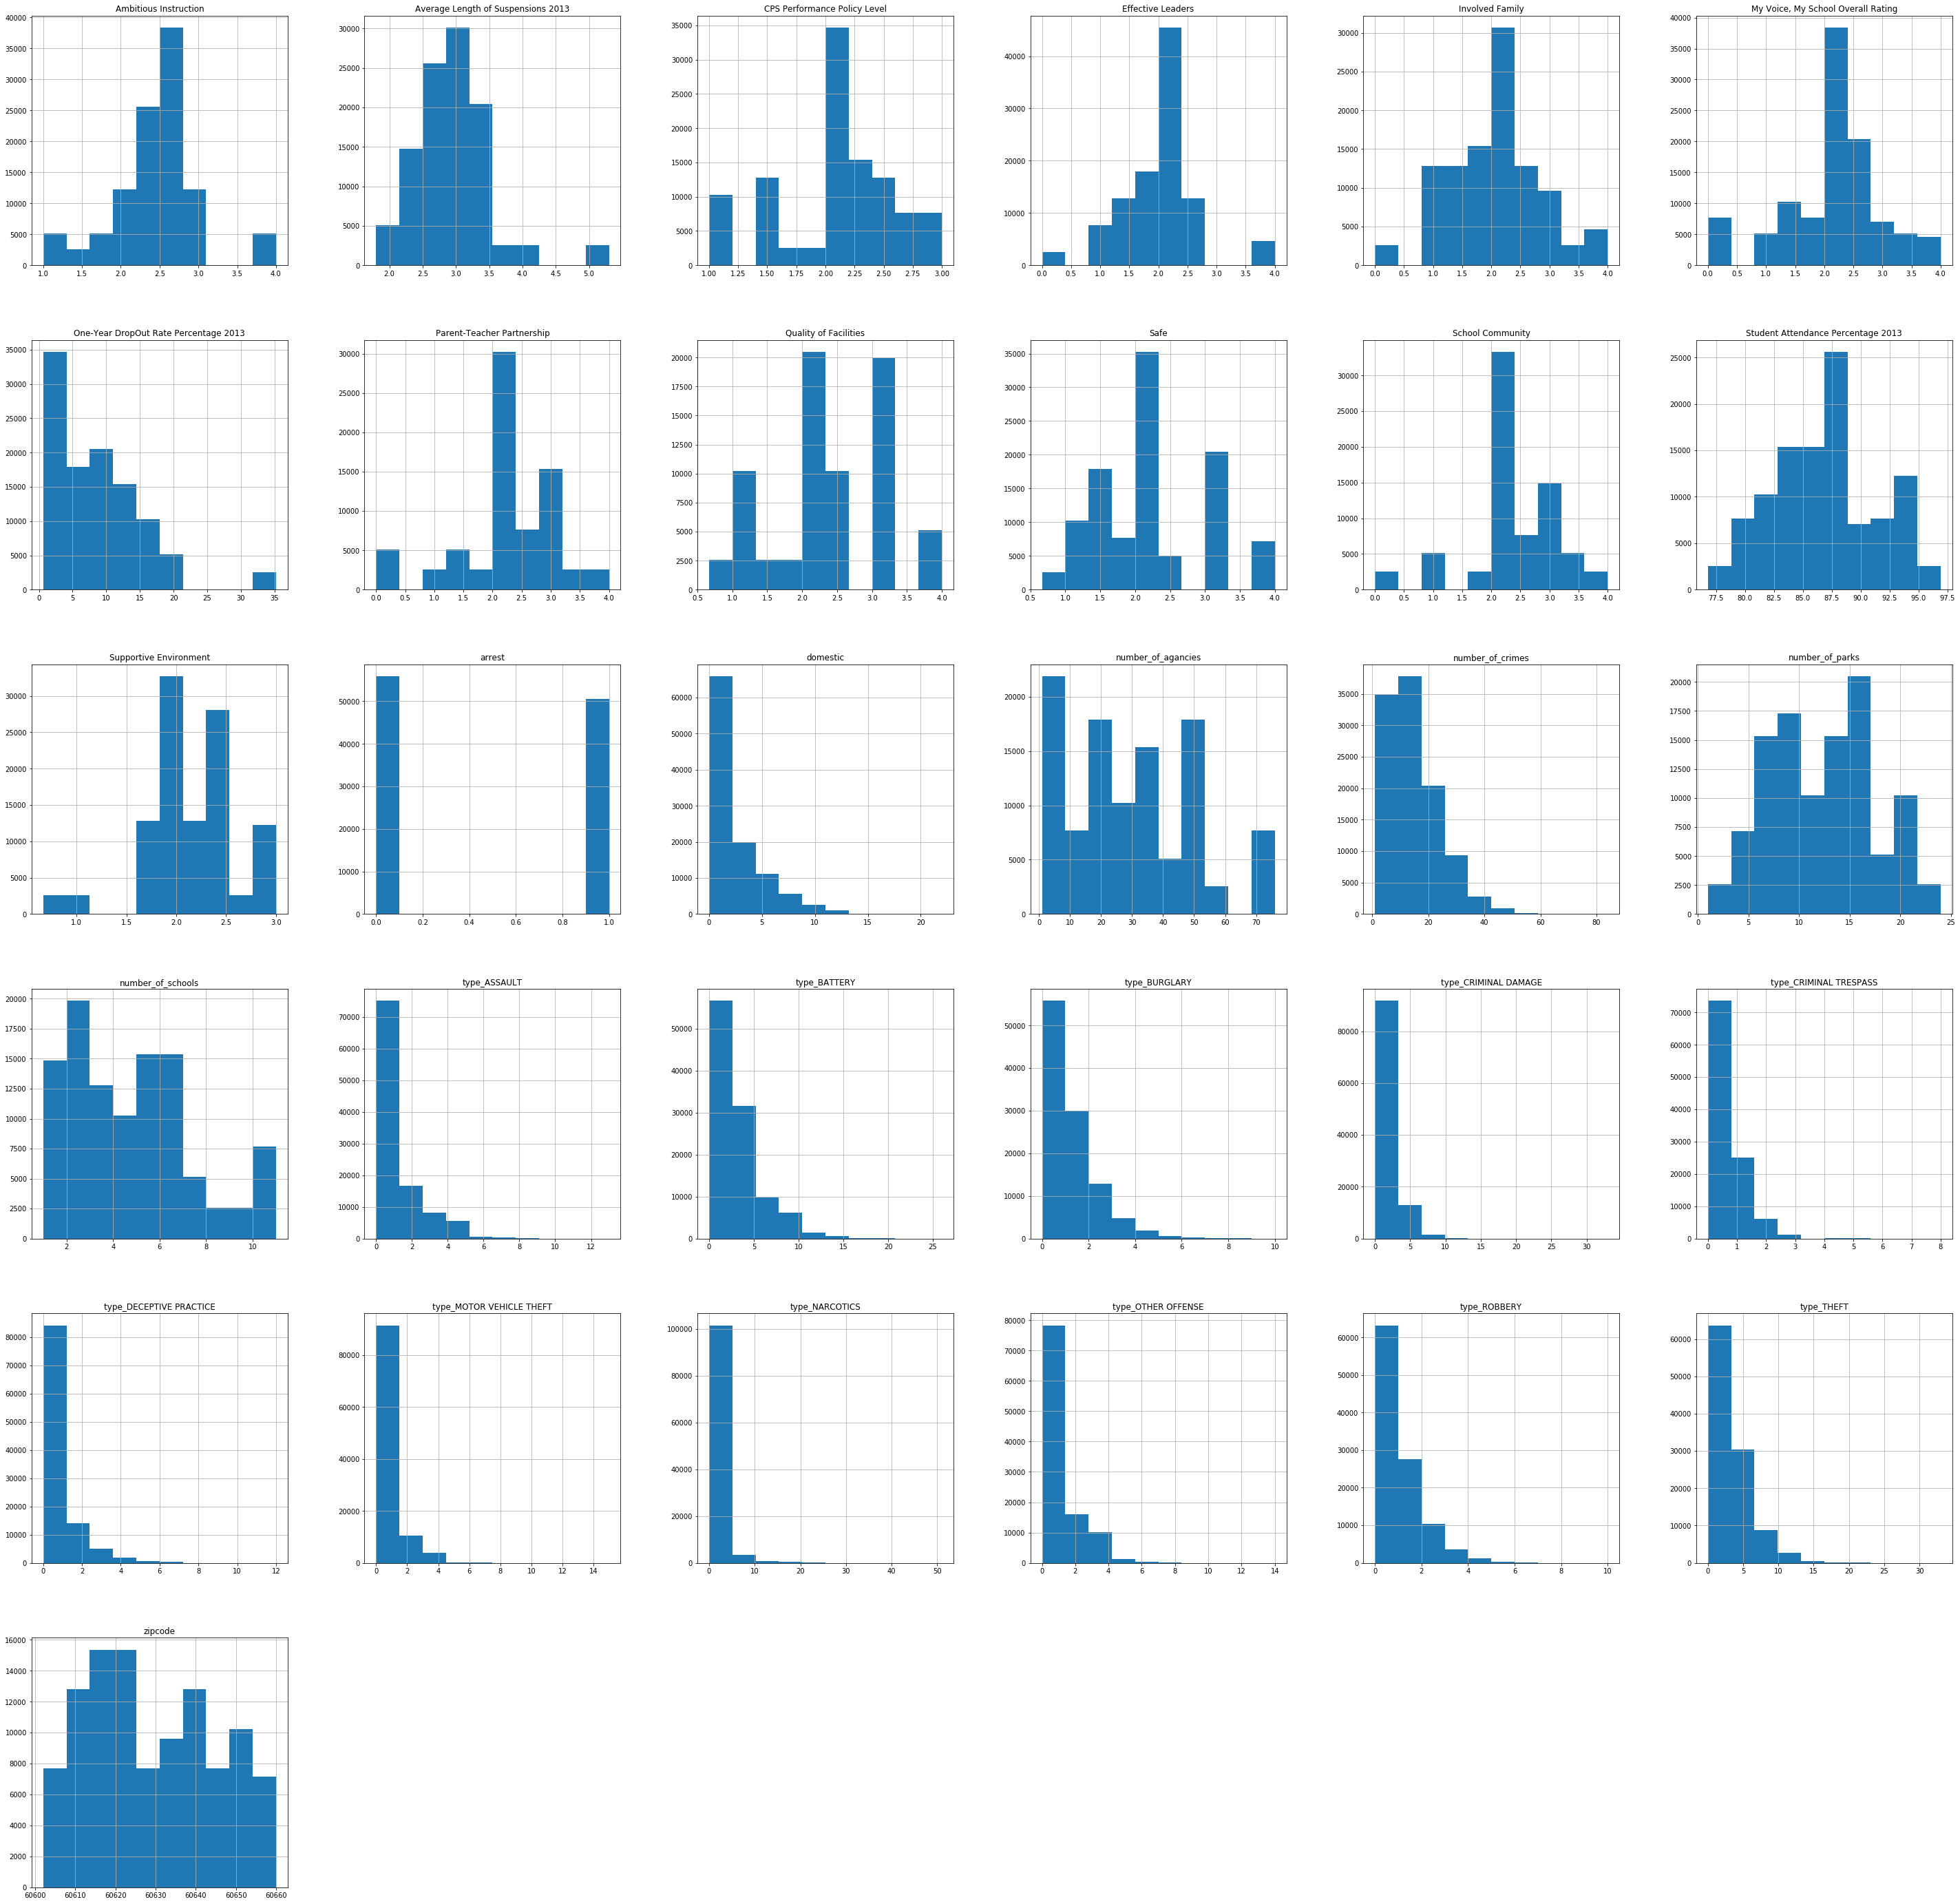

In [9]:
df_crime.hist(figsize= (50,50))
plt.show()

Data looks as expected. No weird amounts were found

In [10]:
df_crime.shape

(106329, 32)

In [11]:
crime_types=  ['type_ASSAULT', 'type_BATTERY', 'type_BURGLARY', 'type_CRIMINAL DAMAGE', 'type_CRIMINAL TRESPASS',
                       'type_DECEPTIVE PRACTICE', 'type_MOTOR VEHICLE THEFT', 'type_NARCOTICS',
                       'type_OTHER OFFENSE', 'type_ROBBERY', 'type_THEFT']

If deciding to remove 67,412 missing location values, the number of rows will still be large enough to analyze

# Split data to train and test:

In [12]:
tmp_df = df_crime.copy()
y = tmp_df.arrest.values
x = tmp_df.drop('arrest', 1).values

In [13]:
x.shape

(106329, 31)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
X_test.shape

(31899, 31)

In [16]:
y_train.shape

(74430,)

# Explore features connections:

In [111]:
corr = df_crime[['zipcode', 'date', 'arrest', 'domestic',
        'number_of_crimes', 'number_of_schools', 'number_of_agancies', 'number_of_parks',
       'CPS Performance Policy Level', 'Involved Family',
       'My Voice, My School Overall Rating', 'Supportive Environment',
       'Ambitious Instruction', 'Effective Leaders', 'Safe',
      'type_NARCOTICS', 'type_BATTERY', 'type_ASSAULT',
        'School Community', 'Parent-Teacher Partnership',
        'Quality of Facilities']].corr()
#        'Student Attendance Percentage 2013', 'Average Length of Suspensions 2013',
#        'One-Year DropOut Rate Percentage 2013']].corr()
corr = df_crime.corr()

In [98]:
corr

,zipcode,arrest,domestic,type_ASSAULT,type_BATTERY,type_BURGLARY,type_CRIMINAL DAMAGE,type_CRIMINAL TRESPASS,type_DECEPTIVE PRACTICE,type_MOTOR VEHICLE THEFT,...,Supportive Environment,Ambitious Instruction,Effective Leaders,Safe,School Community,Parent-Teacher Partnership,Quality of Facilities,Average Length of Suspensions 2013,Student Attendance Percentage 2013,One-Year DropOut Rate Percentage 2013
zipcode,1.000000,-0.079510,0.041200,-0.021058,-0.008119,0.040419,0.001754,-0.074074,-0.162823,0.015668,...,-0.194292,-0.362373,-0.191108,-0.183061,0.016553,0.090816,0.172667,-0.405290,-0.190535,0.037737
arrest,-0.079510,1.000000,0.469430,0.362335,0.498642,0.222538,0.311221,0.285569,0.141426,0.203056,...,-0.077899,0.003770,0.015416,-0.348810,-0.029000,-0.056752,-0.071512,0.183102,-0.280303,0.256089
domestic,0.041200,0.469430,1.000000,0.517148,0.806442,0.279197,0.465344,0.202803,0.066655,0.248532,...,-0.215827,-0.060781,-0.067842,-0.515660,-0.032957,0.004124,-0.094824,0.128535,-0.409519,0.239755
type_ASSAULT,-0.021058,0.362335,0.517148,1.000000,0.422983,0.207410,0.296715,0.154363,0.085705,0.167676,...,-0.138240,-0.034336,-0.042901,-0.366513,-0.024251,-0.012612,-0.091973,0.113606,-0.292331,0.197654
type_BATTERY,-0.008119,0.498642,0.806442,0.422983,1.000000,0.262108,0.411133,0.195324,0.081827,0.239056,...,-0.170769,-0.040761,-0.066455,-0.465839,-0.023556,-0.005776,-0.086469,0.130250,-0.381372,0.241673
type_BURGLARY,0.040419,0.222538,0.279197,0.207410,0.262108,1.000000,0.246300,0.096272,0.050859,0.154276,...,-0.158644,-0.091845,-0.102714,-0.299267,-0.059911,-0.007155,-0.070926,0.044009,-0.244495,0.079330
type_CRIMINAL DAMAGE,0.001754,0.311221,0.465344,0.296715,0.411133,0.246300,1.000000,0.135730,0.049071,0.194401,...,-0.189434,-0.093922,-0.107225,-0.374171,-0.064358,-0.011929,-0.099957,0.068110,-0.306354,0.151735
type_CRIMINAL TRESPASS,-0.074074,0.285569,0.202803,0.154363,0.195324,0.096272,0.135730,1.000000,0.084314,0.072315,...,-0.011302,0.037918,0.022631,-0.133197,-0.001821,-0.043825,-0.021167,0.084747,-0.091508,0.094065
type_DECEPTIVE PRACTICE,-0.162823,0.141426,0.066655,0.085705,0.081827,0.050859,0.049071,0.084314,1.000000,0.045792,...,0.043378,0.108190,0.106886,-0.026040,-0.029870,-0.101936,-0.032704,0.095726,0.045458,0.041502
type_MOTOR VEHICLE THEFT,0.015668,0.203056,0.248532,0.167676,0.239056,0.154276,0.194401,0.072315,0.045792,1.000000,...,-0.114153,-0.086438,-0.099834,-0.219478,-0.030995,0.006372,-0.065604,0.019758,-0.201885,0.115280


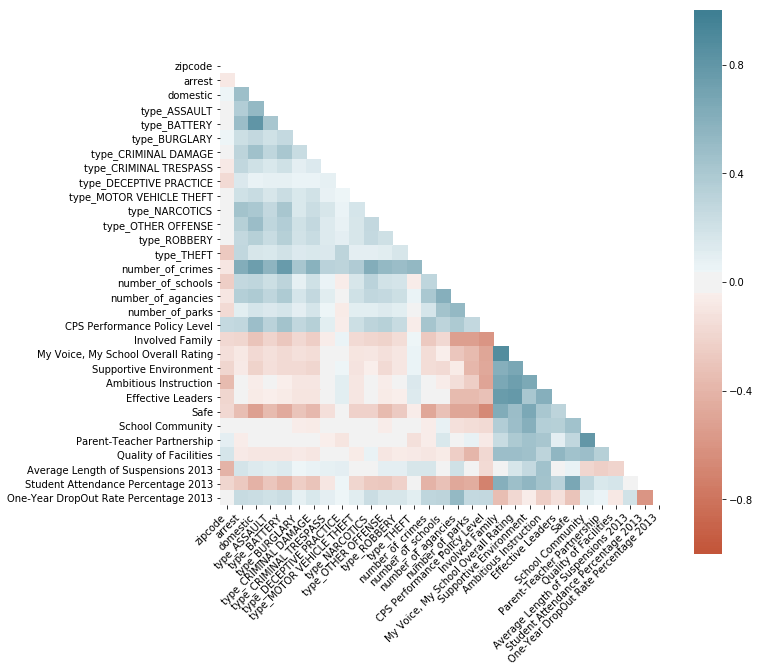

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    mask = mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

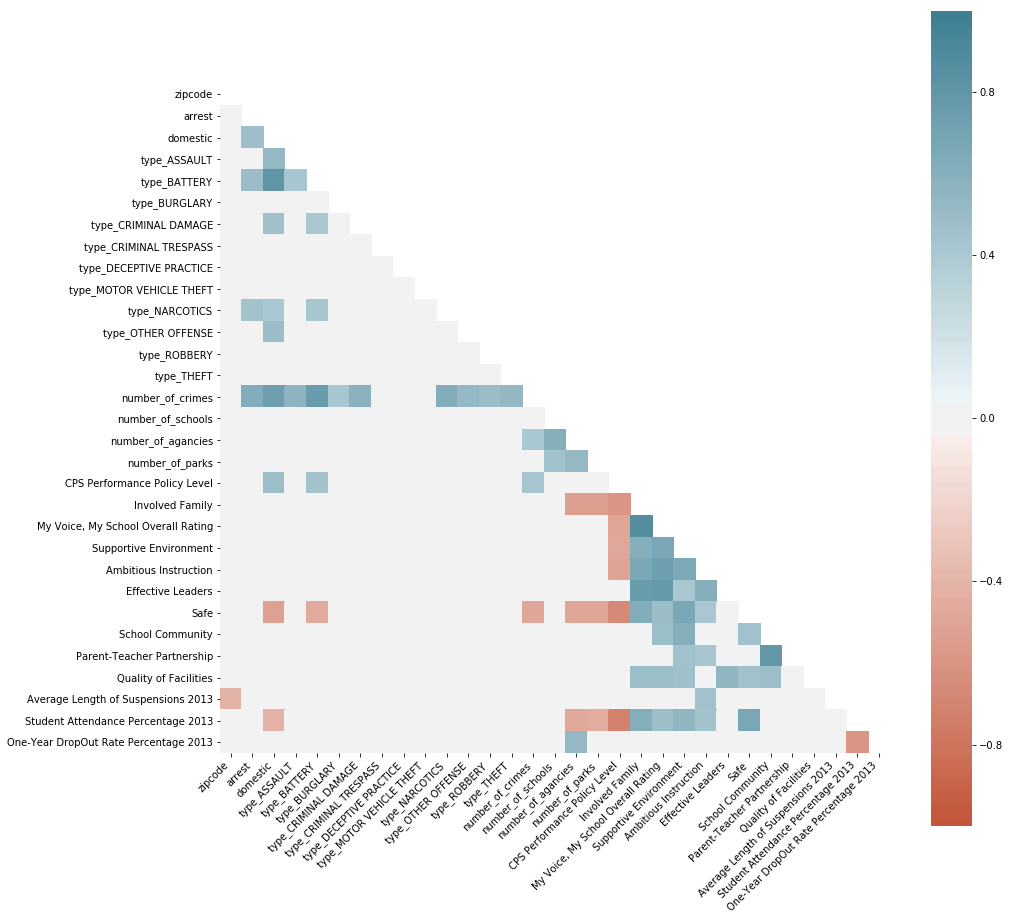

In [113]:
corr[np.abs(corr)<.4] = 0
fig, ax = plt.subplots(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    mask = mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

We don't see something we didn't expected on seeing from the correlation matrix - the location values are linked within a certain value of correlation as the other features aren't correlated in any meanningful value

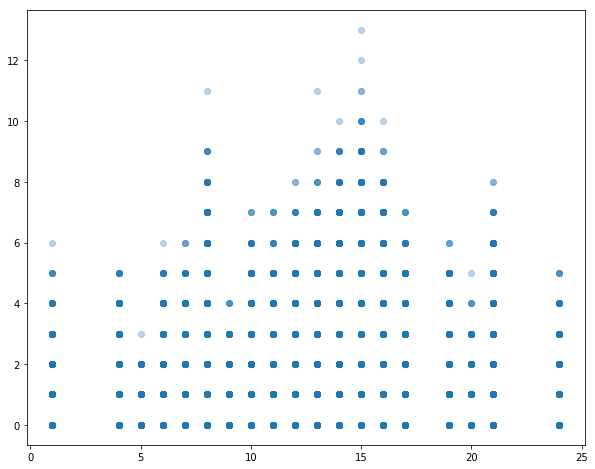

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(df_crime['number_of_parks'], df_crime['type_ASSAULT'], alpha = 0.3)
# plt.xlabel('Student Attendance rate')
# plt.ylabel('# Domestic crimes')
plt.show()

In [58]:
reg = LinearRegression().fit(df_crime['Safe'], df_crime['number_of_crimes'])
reg.score(df_crime['Safe'], df_crime['number_of_crimes'])

ValueError: Expected 2D array, got 1D array instead:
array=[3. 3. 3. ... 3. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f3d4470>,
      dtype=object)

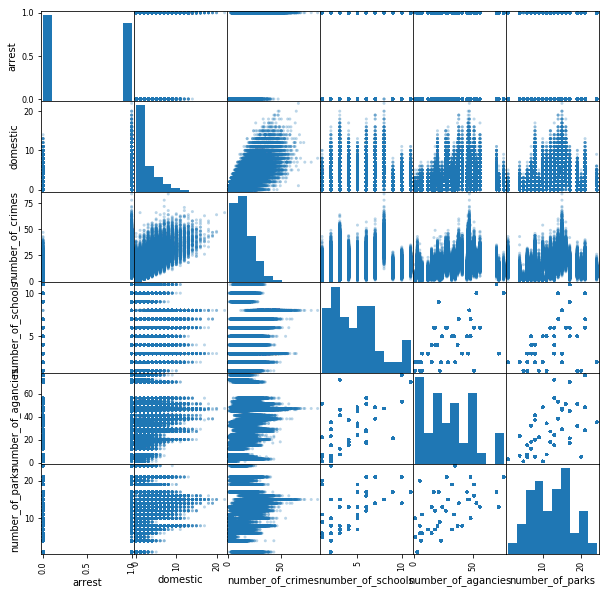

In [119]:
scatter_df = df_crime[['arrest', 'domestic',
        'number_of_crimes', 'number_of_schools', 'number_of_agancies', 'number_of_parks']]
#'zipcode', 'date', 
#        'CPS Performance Policy Level', 'Involved Family',
#        'My Voice, My School Overall Rating', 'Supportive Environment',
#        'Ambitious Instruction', 'Effective Leaders', 'Safe',
#        'School Community', 'Parent-Teacher Partnership',
#        'Quality of Facilities', 'Average Length of Suspensions 2013',
#        'Student Attendance Percentage 2013',
       #'One-Year DropOut Rate Percentage 2013']]
scatter_matrix(scatter_df, alpha = 0.3, figsize= (10,10))

In [30]:
df_crime[df_crime.columns[2:]].corr()['arrest'][:]

arrest                                   1.000000
domestic                                 0.469430
type_ASSAULT                             0.362335
type_BATTERY                             0.498642
type_BURGLARY                            0.222538
type_CRIMINAL DAMAGE                     0.311221
type_CRIMINAL TRESPASS                   0.285569
type_DECEPTIVE PRACTICE                  0.141426
type_MOTOR VEHICLE THEFT                 0.203056
type_NARCOTICS                           0.441393
type_OTHER OFFENSE                       0.342469
type_ROBBERY                             0.273728
type_THEFT                               0.284513
number_of_crimes                         0.615231
number_of_schools                        0.266235
number_of_agancies                       0.353316
number_of_parks                          0.102038
CPS Performance Policy Level             0.283877
Involved Family                         -0.195300
My Voice, My School Overall Rating      -0.081037


# Export to pickle:

In [ ]:
#pd.to_pickle(df_crime, "./crime_data_pickle.pkl")

In [ ]:
#unpickled_df = pd.read_pickle("./crime_data_pickle.pkl")

In [ ]:
unpickled_df.head()